<a href="https://colab.research.google.com/github/gkatuka/all-about-nlp/blob/main/IntegrateAI_NLP_Lessons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scipy  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#@title Importing Libraries
#import libraries 
import warnings
warnings.filterwarnings('ignore')


#Extracting data from twitter using Tweepy
import tweepy
import pandas as pd
import numpy as np

#data cleaning
import re,string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

#sentiment analysis with nltk VADER
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

#sentiment analysis with pretrained model
import pickle
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


## Import data 


In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import data 
df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/integrateAILabs/cats_tweets_raw.csv")
print(df)

                                               full_text
0      @KeepinItGutta @0tis You're selling these 3 ca...
1                       @WellEndowedDre Two Persian cats
2      If this isn't the cutest little cosplayer you'...
3      @Je1j1j Sorry I don‚Äôt eat cats üêà‚Äç‚¨õ lo...
4      @DumptruckSandw1 @punished_cait nah, my cats g...
...                                                  ...
11995  @underhandrea Please stop inviting ppl to upse...
11996  For some reason my cats started eating doors??...
11997  #cat #stories MORE LINKS TO CAT STORIES #cats ...
11998  @kittycoco67 @Deano_JM @jessphillips You need ...
11999  üÜòüÜòüÜò PLEASE RETWEET üö®üö®üö® #horr...

[12000 rows x 1 columns]


## Cleaning the data 

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    # indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    # return df[indices_to_keep].astype(np.float64)
clean_dataset(df)

In [ ]:
#@title Data Cleaning 
tweets = df['full_text'].to_list()
cleaned_tweets = []
for tweet in tweets:
  tweet = re.sub(r"^https://t.co/[a-zA-Z0-9]*\s", ' ', tweet) #remove all links in the beginning
  tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*\s", ' ', tweet) #remove all links in the middle
  tweet = re.sub(r"\s+https://t.co/[a-zA-Z0-9]*$", ' ', tweet) #remove all links at the end
  tweet = tweet.lower()
  tweet = re.sub(r"\@[a-zA-Z0-9]+", " ", tweet)
  tweet = re.sub(r"\W"," ",tweet) #remove non words characters
  tweet = re.sub(r"\d"," ",tweet) #remove digits
  tweet = re.sub(r"\s+[a-z]\s+"," ",tweet) #remove single characters in between text
  tweet = re.sub(r"\s+[a-z]$"," ",tweet) #remove single characters at the end
  tweet = re.sub(r"^[a-z]\s+"," ",tweet) #remove single characters at the beginning
  tweet = re.sub(r"\s+"," ",tweet) #remove all extra spaces
  cleaned_tweets.append(tweet)
X= pd.Series(cleaned_tweets)

df['cleaned_data'] = X
df
# df['cleaned_data'] = df['full_text'].apply(clean_data)

,full_text,cleaned_data
0,@KeepinItGutta @0tis You're selling these 3 ca...,you re selling these cats for otc
1,@WellEndowedDre Two Persian cats,two persian cats
2,If this isn't the cutest little cosplayer you'...,if this isn the cutest little cosplayer you ve...
3,@Je1j1j Sorry I don‚Äôt eat cats üêà‚Äç‚¨õ lo...,sorry don äôt eat cats üêà äç õ lol eat chicks
4,"@DumptruckSandw1 @punished_cait nah, my cats g...",_cait nah my cats get scared shitless when pe...
...,...,...
11995,@underhandrea Please stop inviting ppl to upse...,please stop inviting ppl to upset their cats ...
11996,For some reason my cats started eating doors??...,for some reason my cats started eating doors l...
11997,#cat #stories MORE LINKS TO CAT STORIES #cats ...,cat stories more links to cat stories cats ta...
11998,@kittycoco67 @Deano_JM @jessphillips You need ...,_jm you need to change your name to dont know...


### Sentiment Analysis with VADER 

In [ ]:
#@title Add sentiments
sid = SentimentIntensityAnalyzer()
#add polarity 
df['scores'] = df['cleaned_data'].apply(lambda review: sid.polarity_scores(review))
#add compound values 
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiments'] =df['compound'].apply(lambda c: 'POSITIVE' if c >=0 else 'NEGATIVE')

tweets_df = df[['cleaned_data', 'sentiments']]

In [ ]:
#@title sentimental model with pretrained model
#Load TF-IDF model and classifier
# path = '/content/drive/MyDrive/ColabNotebooks/integrateAILabs/'
# pickle_in = open(path + "tfidfmodel.pickle", 'rb') 
# vectorizer = pickle.load(pickle_in)
# pickle_in = open(path + "classifier.pickle", 'rb') 
# clf = pickle.load(pickle_in)

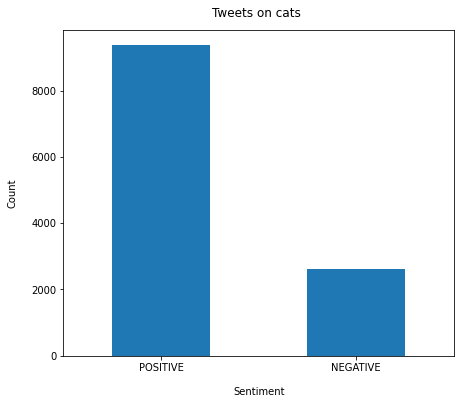

In [ ]:
#@title Sentiments Visualization
#Visualization - VADER sentiments
df['sentiments'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Tweets on cats ", y=1.02);

In [ ]:
#@title Train a Sentiment Analysis Model (LogisticRegression)
# create binary labels
df['sent_label'] = df['sentiments'].map({'NEGATIVE': 0, 'POSITIVE': 1})
Y = df['sent_label'].values


In [ ]:
# Calculate TF_IDF and generate features
tfidf = TfidfVectorizer(decode_error='ignore')
X = tfidf.fit_transform(df['cleaned_data'])

#storing the vectorizer
with open('tfidfmodel.pickle', 'wb') as f:
    pickle.dump(X,f)

In [ ]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [ ]:
from sklearn.linear_model import LogisticRegression

#train Logistic Rregression Model
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
#Test model 
y_pred = classifier.predict(X_test)

In [ ]:
#Check model performance
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)
print(acc)

[[ 213  642]
 [  32 3073]]
0.8297979797979798


In [ ]:
#save the model - pickling
with open('classifier.pickle', 'wb') as f:
    pickle.dump(classifier,f)

In [ ]:
#Import and use saved model - classifier and vectorizer
# with open('tfidfmodel.pickle', 'rb') as f:
#     tfidf = pickle.load(f)
# with open('classifier.pickle', 'rb') as f:
#     clf = pickle.load(f)
    
# sample_text = ["You are a nice person man, have a good life"]
# sample = tfidf.transform(sample_text).toarray()
# print(clf.predict(sample))

#### Test the model

In [ ]:
# sample_text = ["You are a nice person man, have a good life"]
# sample = X.transform(sample_text).toarray()
# print(classifier.predict(sample))

In [ ]:
#@title Train a Sentiment Analysis Model (SVM)
from sklearn.svm import SVC
model = SVC(kernel='linear', C=2.)

model.fit(X_train, y_train)

SVC(C=2.0, kernel='linear')

In [ ]:
#Test model 
y_pred = model.predict(X_test)


In [ ]:
#Check model performance
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
acc = accuracy_score(y_test, y_pred)
print(acc)

[[ 470  385]
 [ 120 2985]]
0.8724747474747475


In [ ]:
#@title Textblob Sentiment Analysis
from textblob import TextBlob


positive = 0
negative = 0
neutral = 0
polarity = 0
sentiments = []

# Iterate with for loop
tweets = df['cleaned_data'].to_list()
for tweet in tweets:
   analysis = TextBlob(tweet) # 'tweet.text' number of tweets that we are searching for
   polarity += analysis.sentiment.polarity
   
   if(analysis.sentiment.polarity == 0):
       neutral += 1
       sentiments.append("neutral")
       
   elif(analysis.sentiment.polarity < 0.00):
       negative += 1
       sentiments.append("negative")

   elif(analysis.sentiment.polarity > 0.00):
       positive += 1
       sentiments.append("positive")
X= pd.Series(sentiments)

df['sentiments'] = X
df  

,full_text,cleaned_data,scores,compound,sentiments,sent_label
0,@KeepinItGutta @0tis You're selling these 3 ca...,you re selling these cats for otc,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,1
1,@WellEndowedDre Two Persian cats,two persian cats,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,1
2,If this isn't the cutest little cosplayer you'...,if this isn the cutest little cosplayer you ve...,"{'neg': 0.0, 'neu': 0.787, 'pos': 0.213, 'comp...",0.5859,negative,1
3,@Je1j1j Sorry I don‚Äôt eat cats üêà‚Äç‚¨õ lo...,sorry don äôt eat cats üêà äç õ lol eat chicks,"{'neg': 0.107, 'neu': 0.661, 'pos': 0.231, 'co...",0.3612,positive,1
4,"@DumptruckSandw1 @punished_cait nah, my cats g...",_cait nah my cats get scared shitless when pe...,"{'neg': 0.115, 'neu': 0.885, 'pos': 0.0, 'comp...",-0.5106,negative,0
...,...,...,...,...,...,...
11995,@underhandrea Please stop inviting ppl to upse...,please stop inviting ppl to upset their cats ...,"{'neg': 0.249, 'neu': 0.363, 'pos': 0.389, 'co...",0.4019,positive,1
11996,For some reason my cats started eating doors??...,for some reason my cats started eating doors l...,"{'neg': 0.085, 'neu': 0.882, 'pos': 0.033, 'co...",-0.4215,negative,0
11997,#cat #stories MORE LINKS TO CAT STORIES #cats ...,cat stories more links to cat stories cats ta...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,positive,1
11998,@kittycoco67 @Deano_JM @jessphillips You need ...,_jm you need to change your name to dont know...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neutral,1


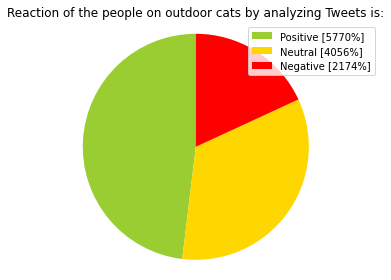

In [ ]:
# Print Pie Chart
    
labels = ['Positive ['+str(positive)+'%]', 
          'Neutral ['+str(neutral)+'%]', 
          'Negative ['+str(negative)+'%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'gold', 'red']

patches, texts = plt.pie(sizes, colors = colors, startangle = 90)
plt.legend(patches, labels, loc = "best")
plt.title('Reaction of the people on outdoor cats by analyzing Tweets is:')
plt.axis('equal')
plt.tight_layout()
plt.show()

### LDA on Sentiments

In [ ]:
tweets_df.head()

,cleaned_data,sentiments
0,you re selling these cats for otc,POSITIVE
1,two persian cats,POSITIVE
2,if this isn the cutest little cosplayer you ve...,POSITIVE
3,sorry don äôt eat cats üêà äç õ lol eat chicks,POSITIVE
4,_cait nah my cats get scared shitless when pe...,NEGATIVE


In [ ]:
#@title Split negative and positive tweets

pos_tweets = tweets_df[tweets_df.sentiments =='POSITIVE']
neg_tweets = tweets_df[tweets_df.sentiments =='NEGATIVE']

In [ ]:
#@title Data prep

#use cleaned_data_stpwds
#start with negative sentiments 
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', min_df=2, max_df=0.9)
neg_cv_vectors = cv.fit_transform(neg_tweets['cleaned_data'])
neg_cv_vectors

<2631x3339 sparse matrix of type '<class 'numpy.int64'>'
	with 25682 stored elements in Compressed Sparse Row format>

In [ ]:
#@title Perform LDA
#perform LDA
from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components = 10, random_state = 42)
lda_neg_mat = LDA.fit_transform(neg_cv_vectors)

In [ ]:
#@title Install pyLDAvis
!pip3 install pyLDAvis --quiet



  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done


In [ ]:
import pyLDAvis.sklearn 

lda_display = pyLDAvis.sklearn.prepare(LDA, neg_cv_vectors,cv, sort_topics=False)
pyLDAvis.display(lda_display)

/usr/local/lib/python3.8/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Iterable
/usr/local/lib/python3.8/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.10 it will stop working
  from collections import Mapping


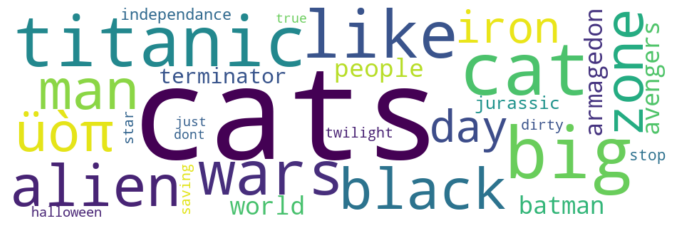

In [ ]:
#@title Word Cloud - Negative sentiments
#Using word cloud 
from wordcloud  import WordCloud
def wordcloud_topics(model,features,no_top_words=30):
    for topic,words in enumerate(model.components_):
        size={}
        largest= words.argsort()[::-1] #inverst sort order
        for i in range(0, no_top_words):
            size[features[largest[i]]] = abs(words[largest[i]])
    wc = WordCloud(background_color="white", max_words = 30, width=940,height=300)
    wc.generate_from_frequencies(size)
    plt.figure(figsize=(12,12))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
#         plt.savefig(f'topiv{topic}.png)
wordcloud_topics(LDA,cv.get_feature_names())

In [ ]:
#@title LDA vis - positive sentiments
#positive sentiments
cv = CountVectorizer(stop_words='english', min_df=5, max_df=0.7)
pos_cv_vectors = cv.fit_transform(pos_tweets['cleaned_data'])

LDA = LatentDirichletAllocation(n_components = 10, random_state = 42)
lda_pos_mat = LDA.fit_transform(pos_cv_vectors)

lda_display = pyLDAvis.sklearn.prepare(LDA, pos_cv_vectors,cv, sort_topics=False)
pyLDAvis.display(lda_display)

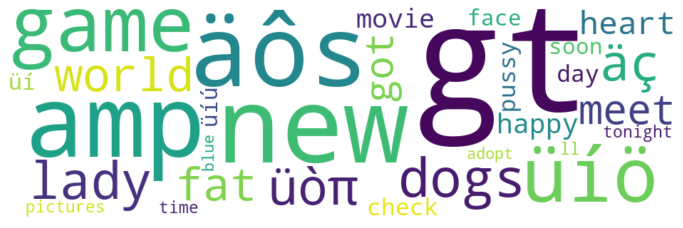

In [ ]:
#@title Word Cloud - positive sentiments
wordcloud_topics(LDA,cv.get_feature_names())

### Text classification with CNN

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
# tweets_df = df[['cleaned_data', 'sentiments']]

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding, LSTM
from tensorflow.keras.models import Model

In [ ]:
# create binary labels (0 and 1)
tweets_df['sents'] = tweets_df['sentiments'].map({'NEGATIVE': 0, 'POSITIVE': 1}) # create new column as 'b_labels'
y = tweets_df['sents'].values

In [ ]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(tweets_df['cleaned_data'], y, test_size=0.33)

In [ ]:
# Convert sentences to sequences
max_vocab_size = 20000
tokenizer = Tokenizer(num_words=max_vocab_size)
tokenizer.fit_on_texts(x_train)
sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [ ]:
# Check word index mapping (to check the number of words in vocabulary)
word2idx = tokenizer.word_index
V = len(word2idx)
print('Total number of unique tokens are: %s' % V)

Total number of unique tokens are: 17075


In [ ]:
# pad sequences (to get  N x T matrix)
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# N: number of samples and T: Number of time steps

Shape of data train tensor: (8040, 86)


In [ ]:
# set the value of T to get sequence length
T = data_train.shape[1]
print(T)

86


In [ ]:
# pad the test set
data_test = pad_sequences(sequences_test, maxlen=T)
# maxlen = T, to truncate longer sentences in test set
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (3960, 86)


#### Build the CNN model

In [ ]:
# Create the model

# Choose embedding dimensionality
D = 20  # this is a hyper parameter, we can choose any word vector size that we want

# Input layer
i = Input(shape=(T,))  # input layer takes in sequences of integers, so shape is T

# Embedding layer
x = Embedding(V + 1, D)(i) # This takes in sequences of integers and returns sequences of word vectors
# This will be an N * T * D array
# we want size of embedding to (V + 1) x D, because first word index starts from 1 and not 0

#  First CNN layer
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)

# Second CNN layer
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)

# Third CNN layer
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)

# Dense layer
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(x=data_train, y=y_train, epochs=5, validation_data=(data_test, y_test))

Epoch 1/5
252/252 [==============================] - 7s 17ms/step - loss: 0.5307 - accuracy: 0.7813 - val_loss: 0.5173 - val_accuracy: 0.7765
Epoch 2/5
252/252 [==============================] - 4s 16ms/step - loss: 0.4489 - accuracy: 0.7979 - val_loss: 0.4963 - val_accuracy: 0.8081
Epoch 3/5
252/252 [==============================] - 4s 16ms/step - loss: 0.2652 - accuracy: 0.8970 - val_loss: 0.5736 - val_accuracy: 0.8167
Epoch 4/5
252/252 [==============================] - 4s 16ms/step - loss: 0.1570 - accuracy: 0.9439 - val_loss: 0.6983 - val_accuracy: 0.8197
Epoch 5/5
252/252 [==============================] - 6s 25ms/step - loss: 0.1189 - accuracy: 0.9617 - val_loss: 0.8929 - val_accuracy: 0.8144


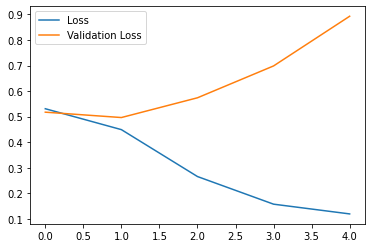

In [ ]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

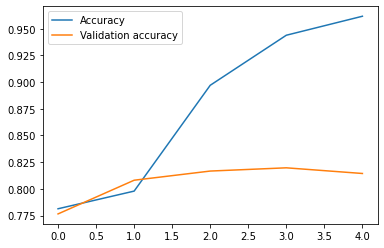

In [ ]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

### Build the RNN Model

In [ ]:
# Choose embedding dimensionality
D = 20  # this is a hyper parameter, we can choose any word vector size that we want

# Hidden state vectorsize (dimensionality)
M = 15

# Input layer
i = Input(shape=(T,))  # input layer takes in sequences of integers, so shape is T

# Embedding layer
x = Embedding(V + 1, D)(i) # This takes in sequences of integers and returns sequences of word vectors
# This will be an N * T * D array
# we want size of embedding to (V + 1) x D, because first word index starts from 1 and not 0

# LSTM layer
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)

# Dense layer
x = Dense(1, activation='sigmoid')(x)
# it is an binary classification problem, so we are using activation function ='sigmoid'

model = Model(i, x)

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
r = model.fit(x=data_train, y=y_train, epochs=10, validation_data=(data_test, y_test))

Epoch 1/10
252/252 [==============================] - 13s 44ms/step - loss: 0.5501 - accuracy: 0.7769 - val_loss: 0.5318 - val_accuracy: 0.7765
Epoch 2/10
252/252 [==============================] - 11s 42ms/step - loss: 0.5231 - accuracy: 0.7828 - val_loss: 0.5205 - val_accuracy: 0.7765
Epoch 3/10
252/252 [==============================] - 13s 50ms/step - loss: 0.4276 - accuracy: 0.8103 - val_loss: 0.4034 - val_accuracy: 0.8301
Epoch 4/10
252/252 [==============================] - 11s 43ms/step - loss: 0.2330 - accuracy: 0.9131 - val_loss: 0.3639 - val_accuracy: 0.8437
Epoch 5/10
252/252 [==============================] - 11s 42ms/step - loss: 0.1395 - accuracy: 0.9539 - val_loss: 0.3986 - val_accuracy: 0.8528
Epoch 6/10
252/252 [==============================] - 11s 43ms/step - loss: 0.0978 - accuracy: 0.9706 - val_loss: 0.4299 - val_accuracy: 0.8409
Epoch 7/10
252/252 [==============================] - 11s 42ms/step - loss: 0.0728 - accuracy: 0.9786 - val_loss: 0.4418 - val_accuracy:

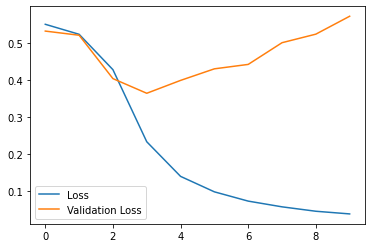

In [ ]:
# Loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

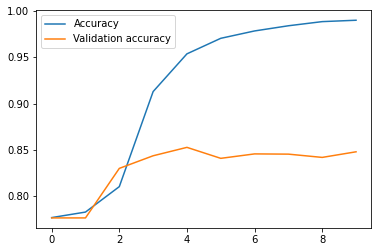

In [ ]:
# Accuracy per iteration
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()